In [65]:
from azureml.opendatasets import NycTlcGreen, NycTlcYellow
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [66]:
green_taxi_df = pd.DataFrame([])

start = datetime.strptime("1/1/2016","%m/%d/%Y")
end = datetime.strptime("1/31/2016","%m/%d/%Y")

green_taxi_df = NycTlcGreen(start, end).to_pandas_dataframe()
green_taxi_df = green_taxi_df.sample(10000)

[Info] read from /var/folders/23/9mlldg893ms3d5sk6kqm5z_40000gn/T/tmpmc030_vq/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=1/part-00119-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2689-1.c000.snappy.parquet


In [67]:
green_taxi_df.describe()

,vendorID,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000,10000.000000,10000.000000,0.0,10000.000000,10000.000000
mean,1.781600,1.351900,2.731902,-73.877175,40.714194,-73.824079,40.683297,1.096300,1.528100,11.907453,0.3538,0.48650,1.217666,0.096819,NaN,14.354168,1.022100
std,0.413181,1.017924,2.904519,2.090942,1.153521,2.861921,1.578001,0.601716,0.524822,9.465621,0.3712,0.08642,2.494855,0.768187,NaN,10.971421,0.147016
min,1.000000,0.000000,0.000000,-74.168060,0.000000,-74.184029,0.000000,1.000000,1.000000,-52.000000,-1.0000,-0.50000,0.000000,0.000000,NaN,-52.800000,1.000000
25%,2.000000,1.000000,1.000000,-73.960421,40.694593,-73.967997,40.695191,1.000000,1.000000,6.000000,0.0000,0.50000,0.000000,0.000000,NaN,7.800000,1.000000
50%,2.000000,1.000000,1.800000,-73.946655,40.746145,-73.945518,40.745613,1.000000,2.000000,9.000000,0.5000,0.50000,0.000000,0.000000,NaN,11.160000,1.000000
75%,2.000000,1.000000,3.440000,-73.918818,40.801068,-73.911795,40.789139,1.000000,2.000000,14.500000,0.5000,0.50000,2.000000,0.000000,NaN,17.160000,1.000000
max,2.000000,8.000000,82.730000,0.000000,40.970654,0.000000,41.115116,5.000000,4.000000,200.000000,1.0000,0.50000,68.000000,16.040000,NaN,260.000000,2.000000


In [68]:
green_taxi_df.head(10)

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,...,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
904528,2,2016-01-05 15:19:46,2016-01-05 15:30:57,1,2.36,None,None,-73.961830,40.805355,-73.940468,...,2,10.5,0.0,0.5,0.3,0.00,0.0,NaN,11.30,1.0
901881,1,2016-01-05 13:21:17,2016-01-05 13:39:09,4,2.10,None,None,-73.926018,40.827625,-73.890228,...,2,13.0,0.0,0.5,0.3,0.00,0.0,NaN,13.80,1.0
585404,1,2016-01-26 17:46:06,2016-01-26 18:07:55,1,3.30,None,None,-73.990791,40.702679,-73.989113,...,1,16.0,1.0,0.5,0.3,3.55,0.0,NaN,21.35,1.0
1365006,2,2016-01-07 04:33:19,2016-01-07 04:57:17,2,11.74,None,None,-73.914413,40.764618,-73.920692,...,2,34.0,0.5,0.5,0.3,0.00,0.0,NaN,35.30,1.0
980361,2,2016-01-21 01:06:14,2016-01-21 01:22:25,2,5.08,None,None,-73.891899,40.746578,-73.847542,...,2,17.5,0.5,0.5,0.3,0.00,0.0,NaN,18.80,1.0
227627,2,2016-01-29 17:29:22,2016-01-29 17:37:03,1,2.04,None,None,-73.987206,40.692810,-73.998283,...,1,9.5,1.0,0.5,0.3,2.26,0.0,NaN,13.56,1.0
1228395,2,2016-01-14 20:03:49,2016-01-14 20:13:36,1,2.25,None,None,-73.920570,40.826130,-73.935081,...,2,9.5,0.5,0.5,0.3,0.00,0.0,NaN,10.80,1.0
1059275,2,2016-01-25 15:42:06,2016-01-25 16:09:27,1,2.50,None,None,-73.918243,40.825996,-73.890770,...,2,17.5,0.0,0.5,0.3,0.00,0.0,NaN,18.30,1.0
304853,2,2016-01-27 13:28:24,2016-01-27 13:36:07,1,0.73,None,None,-73.992287,40.690056,-73.987854,...,2,6.5,0.0,0.5,0.3,0.00,0.0,NaN,7.30,1.0
1421557,2,2016-01-17 20:19:40,2016-01-17 20:38:20,1,5.46,None,None,-73.924927,40.768608,-73.988281,...,1,19.0,0.5,0.5,0.3,4.06,0.0,NaN,24.36,1.0


In [69]:
yellow_taxi_df = pd.DataFrame([])

start = datetime.strptime("1/1/2016","%m/%d/%Y")
end = datetime.strptime("1/31/2016","%m/%d/%Y")

yellow_taxi_df = NycTlcYellow(start, end).to_pandas_dataframe()
yellow_taxi_df = yellow_taxi_df.sample(10000)

[Info] read from /var/folders/23/9mlldg893ms3d5sk6kqm5z_40000gn/T/tmpkp7gsy4_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00000-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426339-90.c000.snappy.parquet
[Info] read from /var/folders/23/9mlldg893ms3d5sk6kqm5z_40000gn/T/tmpkp7gsy4_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00016-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426328-88.c000.snappy.parquet
[Info] read from /var/folders/23/9mlldg893ms3d5sk6kqm5z_40000gn/T/tmpkp7gsy4_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00001-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4-fa74bfbd47bc-426336-89.c000.snappy.parquet
[Info] read from /var/folders/23/9mlldg893ms3d5sk6kqm5z_40000gn/T/tmpkp7gsy4_/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/yellow/puYear=2016/puMonth=1/part-00017-tid-8898858832658823408-a1de80bd-eed3-4d11-b9d4

In [70]:
yellow_taxi_df.describe()

,passengerCount,tripDistance,startLon,startLat,endLon,endLat,rateCodeId,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.645900,2.855045,-72.856030,40.136496,-72.892913,40.157640,1.034000,12.317629,0.319050,0.498400,1.726415,0.279993,15.441397
std,1.307549,3.548477,9.021600,4.970043,8.873209,4.888431,0.268051,10.462271,0.367894,0.029112,2.448826,1.290490,12.870578
min,1.000000,0.000000,-74.073502,0.000000,-74.266708,0.000000,1.000000,-4.000000,0.000000,-0.500000,0.000000,0.000000,-4.800000
25%,1.000000,1.000000,-73.991264,40.737571,-73.990845,40.735980,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,8.300000
50%,1.000000,1.640000,-73.981209,40.754574,-73.979118,40.755024,1.000000,9.000000,0.000000,0.500000,1.260000,0.000000,11.300000
75%,2.000000,3.000000,-73.965660,40.768605,-73.961729,40.770123,1.000000,14.000000,0.500000,0.500000,2.300000,0.000000,16.800000
max,6.000000,37.700000,0.000000,40.885361,0.000000,41.114262,5.000000,212.000000,1.000000,0.500000,60.000000,19.290000,254.760000


In [71]:
yellow_taxi_df.head(10)

,vendorID,tpepPickupDateTime,tpepDropoffDateTime,passengerCount,tripDistance,puLocationId,doLocationId,startLon,startLat,endLon,...,rateCodeId,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
321712,2,2016-01-09 17:27:23,2016-01-09 17:33:38,1,0.58,None,None,-73.988792,40.753311,-73.988663,...,1,N,1,5.5,0.0,0.5,0.3,1.26,0.00,7.56
365549,2,2016-01-08 12:07:03,2016-01-08 12:14:32,1,1.19,None,None,-73.986031,40.767693,-73.998909,...,1,N,2,7.0,0.0,0.5,0.3,0.00,0.00,7.80
369285,2,2016-01-16 00:48:11,2016-01-16 01:12:40,1,6.22,None,None,-73.987991,40.723824,-73.993912,...,1,N,1,23.0,0.5,0.5,0.3,4.86,0.00,29.16
358510,1,2016-01-01 19:03:40,2016-01-01 19:07:36,2,1.10,None,None,-73.967819,40.759220,-73.954613,...,1,N,1,5.5,0.0,0.5,0.3,1.26,0.00,7.56
297067,1,2016-01-27 10:05:22,2016-01-27 10:11:18,1,0.60,None,None,-73.972748,40.759705,-73.974892,...,1,N,1,5.5,0.0,0.5,0.3,1.25,0.00,7.55
64431,1,2016-01-06 00:03:22,2016-01-06 00:16:07,1,4.60,None,None,-73.986633,40.730366,-73.955078,...,1,N,1,15.0,0.5,0.5,0.3,3.25,0.00,19.55
503238,1,2016-01-08 12:50:37,2016-01-08 12:54:36,1,0.30,None,None,-73.996147,40.737946,-73.996536,...,1,N,2,4.5,0.0,0.5,0.3,0.00,0.00,5.30
19378,2,2016-01-02 16:28:02,2016-01-02 17:20:33,1,18.48,None,None,-73.781807,40.644749,-73.979591,...,2,N,1,52.0,0.0,0.5,0.3,10.00,5.54,68.34
3600,2,2016-01-06 22:35:18,2016-01-06 22:42:47,2,1.07,None,None,-73.990021,40.751495,-73.981277,...,1,N,2,6.5,0.5,0.5,0.3,0.00,0.00,7.80
358624,2,2016-01-30 20:15:48,2016-01-30 20:18:39,3,0.39,None,None,-73.987984,40.718586,-73.993828,...,1,N,2,4.0,0.5,0.5,0.3,0.00,0.00,5.30


In [72]:
green_taxi_df['puLocationId'].unique()

array([None], dtype=object)

In [73]:
green_taxi_df['doLocationId'].unique()

array([None], dtype=object)

In [74]:
green_taxi_df.columns

Index(['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'pickupLongitude', 'pickupLatitude', 'dropoffLongitude',
       'dropoffLatitude', 'rateCodeID', 'storeAndFwdFlag', 'paymentType',
       'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipAmount',
       'tollsAmount', 'ehailFee', 'totalAmount', 'tripType'],
      dtype='object')

In [75]:
yellow_taxi_df.columns

Index(['vendorID', 'tpepPickupDateTime', 'tpepDropoffDateTime',
       'passengerCount', 'tripDistance', 'puLocationId', 'doLocationId',
       'startLon', 'startLat', 'endLon', 'endLat', 'rateCodeId',
       'storeAndFwdFlag', 'paymentType', 'fareAmount', 'extra', 'mtaTax',
       'improvementSurcharge', 'tipAmount', 'tollsAmount', 'totalAmount'],
      dtype='object')

We will delete **puLocationId** and **doLocationId** due to data unavailability in these columns.

From the cost perspective we are interested in **fareAmount**. So, we will delete all other related columns like **tipAmount**, **tipAmount**, **mtaTax**, **tollsAmount**, **totalAmount**, **paymentType**, **extra**, **improvementSurcharge**.

The **ehailFee** and **tripType** columns will be deleted since they are not available in the yellow dataset.



In [76]:
green_columns = ['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime',
                 'passengerCount', 'tripDistance', 'pickupLongitude',
                 'pickupLatitude', 'dropoffLongitude', 'dropoffLatitude',
                 'storeAndFwdFlag', 'fareAmount']

green_taxi_df_updated = green_taxi_df[green_columns]

In [77]:
yellow_columns = ['vendorID', 'tpepPickupDateTime', 'tpepDropoffDateTime',
                 'passengerCount', 'tripDistance', 'startLon',
                 'startLat', 'endLon', 'endLat',
                 'storeAndFwdFlag', 'fareAmount']

yellow_taxi_df_updated = yellow_taxi_df[yellow_columns]

In [78]:
green_columns_updated = {'vendorID':'vendor_id', 'lpepPickupDatetime':'pickup_dt', 'lpepDropoffDatetime':'dropoff_dt',
                 'passengerCount':'passengers', 'tripDistance':'distance', 'pickupLongitude':'pickup_lon',
                 'pickupLatitude':'pickup_lat', 'dropoffLongitude':'dropoff_lon', 'dropoffLatitude':'dropoff_lat',
                 'storeAndFwdFlag':'store_flag', 'fareAmount':'fare_amount'}

yellow_columns_updated = {'vendorID':'vendor_id', 'tpepPickupDateTime':'pickup_dt', 'tpepDropoffDateTime':'dropoff_dt',
                 'passengerCount':'passengers', 'tripDistance':'distance', 'startLon':'pickup_lon',
                 'startLat':'pickup_lat', 'endLon':'dropoff_lon', 'endLat':'dropoff_lat',
                 'storeAndFwdFlag':'store_flag', 'fareAmount':'fare_amount'}

In [79]:
green_taxi_df_updated = green_taxi_df_updated.rename(columns = green_columns_updated)
yellow_taxi_df_updated = yellow_taxi_df_updated.rename(columns = yellow_columns_updated)

In [80]:
yellow_taxi_df_updated["vendor_id"] = pd.to_numeric(yellow_taxi_df_updated["vendor_id"])

In [81]:
yellow_taxi_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 321712 to 330565
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   vendor_id    10000 non-null  int64         
 1   pickup_dt    10000 non-null  datetime64[ns]
 2   dropoff_dt   10000 non-null  datetime64[ns]
 3   passengers   10000 non-null  int32         
 4   distance     10000 non-null  float64       
 5   pickup_lon   10000 non-null  float64       
 6   pickup_lat   10000 non-null  float64       
 7   dropoff_lon  10000 non-null  float64       
 8   dropoff_lat  10000 non-null  float64       
 9   store_flag   10000 non-null  object        
 10  fare_amount  10000 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int32(1), int64(1), object(1)
memory usage: 898.4+ KB


In [82]:
full_taxi_df = pd.concat([green_taxi_df_updated, yellow_taxi_df_updated], ignore_index=True)
full_taxi_df.reset_index(inplace=True, drop=True)

In [83]:
full_taxi_df = full_taxi_df.dropna(how="all")

In [84]:
full_taxi_df.head(10)

,vendor_id,pickup_dt,dropoff_dt,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,store_flag,fare_amount
0,2,2016-01-05 15:19:46,2016-01-05 15:30:57,1,2.36,-73.961830,40.805355,-73.940468,40.820526,N,10.5
1,1,2016-01-05 13:21:17,2016-01-05 13:39:09,4,2.10,-73.926018,40.827625,-73.890228,40.817368,N,13.0
2,1,2016-01-26 17:46:06,2016-01-26 18:07:55,1,3.30,-73.990791,40.702679,-73.989113,40.730759,N,16.0
3,2,2016-01-07 04:33:19,2016-01-07 04:57:17,2,11.74,-73.914413,40.764618,-73.920692,40.864262,N,34.0
4,2,2016-01-21 01:06:14,2016-01-21 01:22:25,2,5.08,-73.891899,40.746578,-73.847542,40.689953,N,17.5
5,2,2016-01-29 17:29:22,2016-01-29 17:37:03,1,2.04,-73.987206,40.692810,-73.998283,40.715786,N,9.5
6,2,2016-01-14 20:03:49,2016-01-14 20:13:36,1,2.25,-73.920570,40.826130,-73.935081,40.813251,N,9.5
7,2,2016-01-25 15:42:06,2016-01-25 16:09:27,1,2.50,-73.918243,40.825996,-73.890770,40.832218,N,17.5
8,2,2016-01-27 13:28:24,2016-01-27 13:36:07,1,0.73,-73.992287,40.690056,-73.987854,40.685768,N,6.5
9,2,2016-01-17 20:19:40,2016-01-17 20:38:20,1,5.46,-73.924927,40.768608,-73.988281,40.731213,N,19.0


In [85]:
full_taxi_df.describe()

,vendor_id,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,fare_amount
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.663200,1.498900,2.793474,-73.366603,40.425345,-73.358496,40.420468,12.112541
std,0.472628,1.180876,3.243027,6.568044,3.619220,6.608844,3.641682,9.978258
min,1.000000,0.000000,0.000000,-74.168060,0.000000,-74.266708,0.000000,-52.000000
25%,1.000000,1.000000,1.000000,-73.985186,40.720869,-73.984804,40.720335,6.500000
50%,2.000000,1.000000,1.700000,-73.962566,40.750906,-73.964317,40.751680,9.000000
75%,2.000000,1.000000,3.240000,-73.940807,40.775127,-73.938934,40.774438,14.000000
max,2.000000,8.000000,82.730000,0.000000,40.970654,0.000000,41.115116,212.000000


In [86]:
full_taxi_df.dtypes

vendor_id               int64
pickup_dt      datetime64[ns]
dropoff_dt     datetime64[ns]
passengers              int32
distance              float64
pickup_lon            float64
pickup_lat            float64
dropoff_lon           float64
dropoff_lat           float64
store_flag             object
fare_amount           float64
dtype: object

In [87]:
full_taxi_df['vendor_id'].unique()

array([2, 1])

In [88]:
full_taxi_df['store_flag'].unique()

array(['N', 'Y'], dtype=object)

In [89]:
full_taxi_df[(full_taxi_df['pickup_lat']>0) 
             & (full_taxi_df['dropoff_lat']>0) 
             & (full_taxi_df['pickup_lon']<0)
             & (full_taxi_df['dropoff_lon']<0)
             & (full_taxi_df['fare_amount']>=0)].describe()

,vendor_id,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,fare_amount
count,19797.000000,19797.000000,19797.000000,19797.000000,19797.000000,19797.000000,19797.000000,19797.000000
mean,1.665303,1.499066,2.800537,-73.954578,40.749292,-73.953827,40.748464,12.121704
std,0.471896,1.181054,3.245335,0.044816,0.045185,0.047650,0.047487,9.899684
min,1.000000,0.000000,0.000000,-74.168060,40.574463,-74.266708,40.564281,0.000000
25%,1.000000,1.000000,1.000000,-73.985313,40.721352,-73.984970,40.721352,6.500000
50%,2.000000,1.000000,1.700000,-73.963081,40.751122,-73.964691,40.752094,9.000000
75%,2.000000,1.000000,3.250000,-73.941795,40.775326,-73.939575,40.774601,14.000000
max,2.000000,8.000000,82.730000,-73.195221,40.970654,-73.195251,41.115116,212.000000


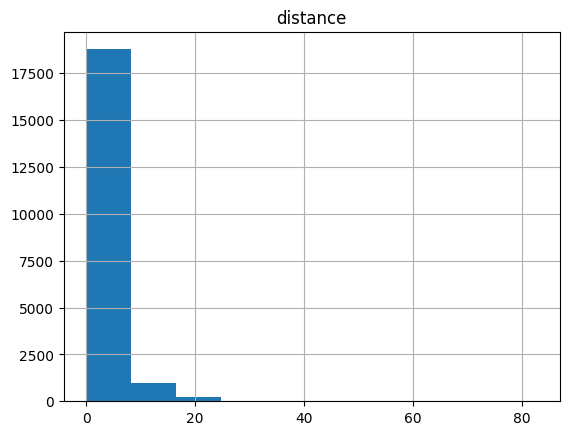

In [90]:
full_taxi_df["distance"].hist()
plt.title("distance")
plt.show()

In [91]:
full_taxi_df[full_taxi_df['distance']==0]

,vendor_id,pickup_dt,dropoff_dt,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,store_flag,fare_amount
23,2,2016-01-28 20:58:18,2016-01-28 20:58:31,3,0.0,-73.764038,40.713509,-73.764046,40.713490,N,35.0
59,1,2016-01-03 01:15:50,2016-01-03 01:15:55,1,0.0,-73.939468,40.713894,-73.939468,40.713894,N,2.5
150,2,2016-01-27 12:52:38,2016-01-27 12:52:53,1,0.0,-73.936836,40.764538,-73.936722,40.764622,N,0.0
188,1,2016-01-30 15:15:38,2016-01-30 15:15:58,1,0.0,0.000000,0.000000,0.000000,0.000000,N,52.0
201,2,2016-01-13 21:09:48,2016-01-13 21:09:57,1,0.0,-73.972977,40.646828,-73.973007,40.646843,N,2.5
...,...,...,...,...,...,...,...,...,...,...,...
18447,2,2016-01-30 17:58:01,2016-01-30 17:58:04,1,0.0,0.000000,0.000000,0.000000,0.000000,N,15.0
18628,2,2016-01-12 05:24:20,2016-01-12 05:24:52,1,0.0,0.000000,0.000000,0.000000,0.000000,N,78.0
18769,2,2016-01-16 20:18:38,2016-01-16 20:27:44,1,0.0,-74.003387,40.748268,-73.997398,40.732651,N,7.0
18965,2,2016-01-21 17:54:57,2016-01-21 18:03:32,1,0.0,-73.989410,40.748886,-74.004669,40.752293,N,6.5


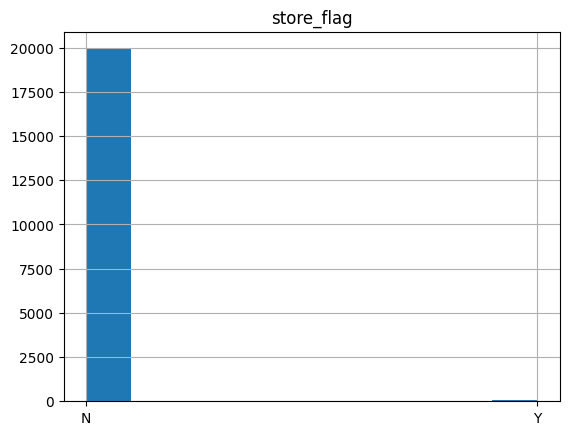

In [92]:
full_taxi_df["store_flag"].hist()
plt.title("store_flag")
plt.show()

In [93]:
len(full_taxi_df[full_taxi_df["store_flag"]=="Y"])

100

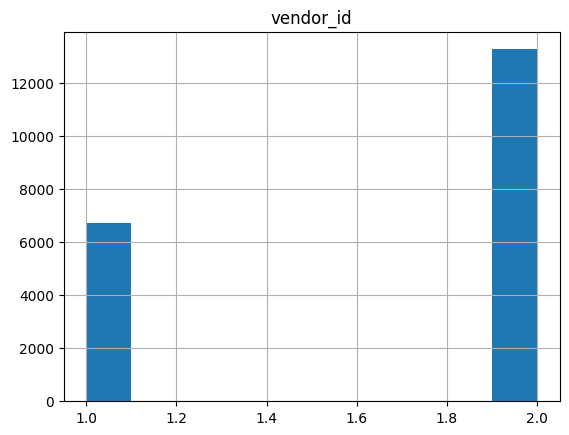

In [94]:
full_taxi_df["vendor_id"].hist()
plt.title("vendor_id")
plt.show()

In [95]:
full_taxi_df = full_taxi_df.drop(['store_flag'], axis=1)

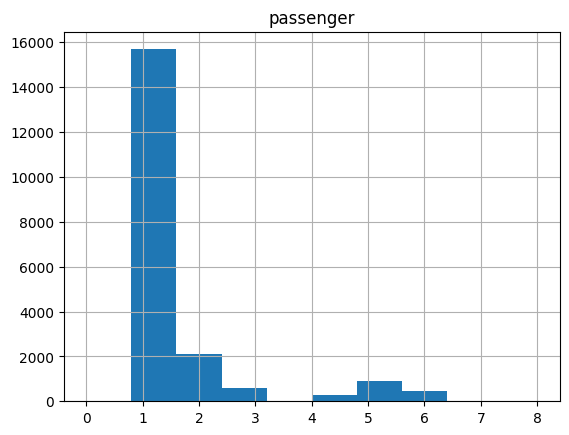

In [96]:
full_taxi_df["passengers"].hist()
plt.title("passenger")
plt.show()

In [97]:
full_taxi_df["passengers"] = np.where((full_taxi_df.passengers <3), 0, 1)

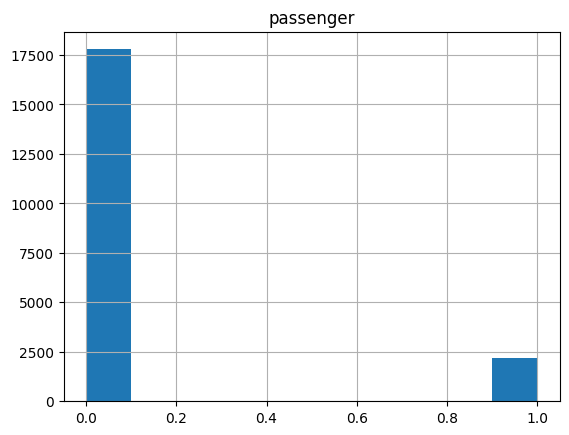

In [98]:
full_taxi_df["passengers"].hist()
plt.title("passenger")
plt.show()

In [99]:
full_taxi_df["vendor_id"] = np.where((full_taxi_df.vendor_id ==1), 0, 1)

In [100]:
full_taxi_df.head(10)

,vendor_id,pickup_dt,dropoff_dt,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,fare_amount
0,1,2016-01-05 15:19:46,2016-01-05 15:30:57,0,2.36,-73.961830,40.805355,-73.940468,40.820526,10.5
1,0,2016-01-05 13:21:17,2016-01-05 13:39:09,1,2.10,-73.926018,40.827625,-73.890228,40.817368,13.0
2,0,2016-01-26 17:46:06,2016-01-26 18:07:55,0,3.30,-73.990791,40.702679,-73.989113,40.730759,16.0
3,1,2016-01-07 04:33:19,2016-01-07 04:57:17,0,11.74,-73.914413,40.764618,-73.920692,40.864262,34.0
4,1,2016-01-21 01:06:14,2016-01-21 01:22:25,0,5.08,-73.891899,40.746578,-73.847542,40.689953,17.5
5,1,2016-01-29 17:29:22,2016-01-29 17:37:03,0,2.04,-73.987206,40.692810,-73.998283,40.715786,9.5
6,1,2016-01-14 20:03:49,2016-01-14 20:13:36,0,2.25,-73.920570,40.826130,-73.935081,40.813251,9.5
7,1,2016-01-25 15:42:06,2016-01-25 16:09:27,0,2.50,-73.918243,40.825996,-73.890770,40.832218,17.5
8,1,2016-01-27 13:28:24,2016-01-27 13:36:07,0,0.73,-73.992287,40.690056,-73.987854,40.685768,6.5
9,1,2016-01-17 20:19:40,2016-01-17 20:38:20,0,5.46,-73.924927,40.768608,-73.988281,40.731213,19.0


In [101]:
time_series = pd.DatetimeIndex(full_taxi_df["pickup_dt"], dtype="datetime64[ns]")
full_taxi_df["pickup_weekday"] = time_series.dayofweek
# full_taxi_df["pickup_month"] = time_series.month
full_taxi_df["pickup_monthday"] = time_series.day
full_taxi_df["pickup_hour"] = time_series.hour
full_taxi_df["pickup_minute"] = time_series.minute

time_series = pd.DatetimeIndex(full_taxi_df["dropoff_dt"], dtype="datetime64[ns]")
full_taxi_df["dropoff_weekday"] = time_series.dayofweek
# full_taxi_df["dropoff_month"] = time_series.month
full_taxi_df["dropoff_monthday"] = time_series.day
full_taxi_df["dropoff_hour"] = time_series.hour
full_taxi_df["dropoff_minute"] = time_series.minute

del full_taxi_df["dropoff_dt"]
del full_taxi_df["pickup_dt"]

full_taxi_df.reset_index(inplace=True, drop=True)

In [102]:
full_taxi_df.head(10)

,vendor_id,passengers,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,fare_amount,pickup_weekday,pickup_monthday,pickup_hour,pickup_minute,dropoff_weekday,dropoff_monthday,dropoff_hour,dropoff_minute
0,1,0,2.36,-73.961830,40.805355,-73.940468,40.820526,10.5,1,5,15,19,1,5,15,30
1,0,1,2.10,-73.926018,40.827625,-73.890228,40.817368,13.0,1,5,13,21,1,5,13,39
2,0,0,3.30,-73.990791,40.702679,-73.989113,40.730759,16.0,1,26,17,46,1,26,18,7
3,1,0,11.74,-73.914413,40.764618,-73.920692,40.864262,34.0,3,7,4,33,3,7,4,57
4,1,0,5.08,-73.891899,40.746578,-73.847542,40.689953,17.5,3,21,1,6,3,21,1,22
5,1,0,2.04,-73.987206,40.692810,-73.998283,40.715786,9.5,4,29,17,29,4,29,17,37
6,1,0,2.25,-73.920570,40.826130,-73.935081,40.813251,9.5,3,14,20,3,3,14,20,13
7,1,0,2.50,-73.918243,40.825996,-73.890770,40.832218,17.5,0,25,15,42,0,25,16,9
8,1,0,0.73,-73.992287,40.690056,-73.987854,40.685768,6.5,2,27,13,28,2,27,13,36
9,1,0,5.46,-73.924927,40.768608,-73.988281,40.731213,19.0,6,17,20,19,6,17,20,38


In [103]:
full_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vendor_id         20000 non-null  int64  
 1   passengers        20000 non-null  int64  
 2   distance          20000 non-null  float64
 3   pickup_lon        20000 non-null  float64
 4   pickup_lat        20000 non-null  float64
 5   dropoff_lon       20000 non-null  float64
 6   dropoff_lat       20000 non-null  float64
 7   fare_amount       20000 non-null  float64
 8   pickup_weekday    20000 non-null  int64  
 9   pickup_monthday   20000 non-null  int64  
 10  pickup_hour       20000 non-null  int64  
 11  pickup_minute     20000 non-null  int64  
 12  dropoff_weekday   20000 non-null  int64  
 13  dropoff_monthday  20000 non-null  int64  
 14  dropoff_hour      20000 non-null  int64  
 15  dropoff_minute    20000 non-null  int64  
dtypes: float64(6), int64(10)
memory usage: 2

In [104]:
corrM = full_taxi_df.corr()

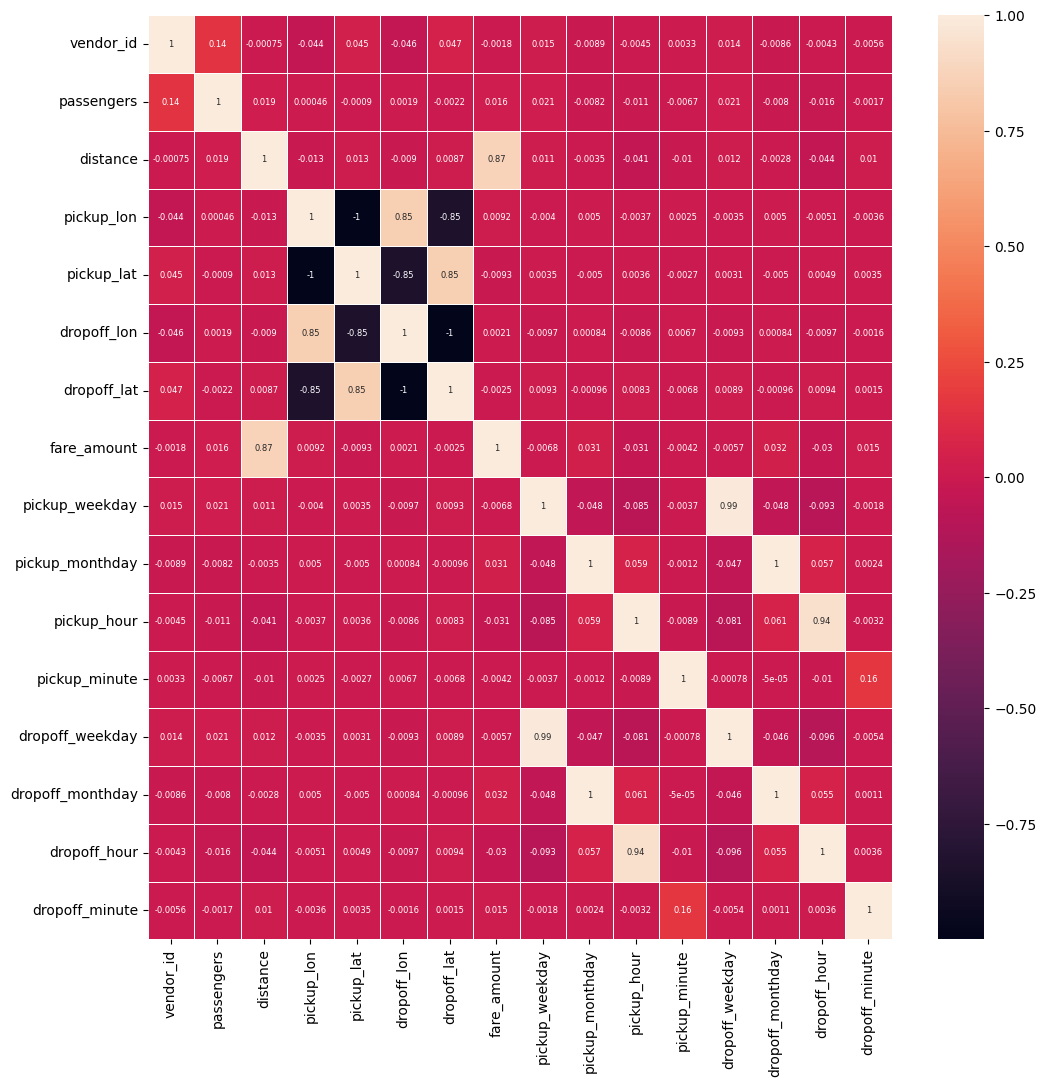

In [105]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(corrM, annot=True, linewidth=.5, ax=ax, annot_kws={"fontsize":6})

In [106]:
del full_taxi_df["dropoff_weekday"]
del full_taxi_df["dropoff_monthday"]

In [107]:
y = full_taxi_df["fare_amount"]
X = full_taxi_df.drop(['fare_amount'], axis=1)